In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.feature_selection import RFE, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X, y, true_coef = make_regression(
    n_samples=300,
    n_features=12,
    n_informative=4,
    noise=15,
    coef=True
)

feature_names = [f"x{i}" for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)

In [2]:
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.008010,0.047622,-0.038337,0.054710,0.173609,0.025260,0.016408,0.069801,0.099601,-0.001038,-0.077348,-0.059103
std,1.036925,1.037592,0.974231,0.918381,1.006196,0.968789,1.022290,1.002006,1.012267,0.981510,0.993187,1.011703
min,-2.603137,-2.940389,-2.619745,-2.635748,-2.848543,-3.019512,-2.991136,-2.591042,-2.562334,-2.747505,-2.896255,-3.241267
25%,-0.677138,-0.575378,-0.707821,-0.544848,-0.437441,-0.626422,-0.752086,-0.660736,-0.552967,-0.669440,-0.774334,-0.758693
50%,-0.089719,0.080009,-0.020389,0.146843,0.203010,0.074243,0.033847,-0.037396,0.050906,-0.017365,-0.070899,-0.075938
75%,0.699231,0.733889,0.543510,0.626633,0.859781,0.679054,0.682532,0.755920,0.803336,0.658720,0.564106,0.616143
max,3.137749,3.926238,2.644343,2.426716,3.852731,2.412615,3.193108,2.720169,2.620793,2.526932,2.579709,3.078881


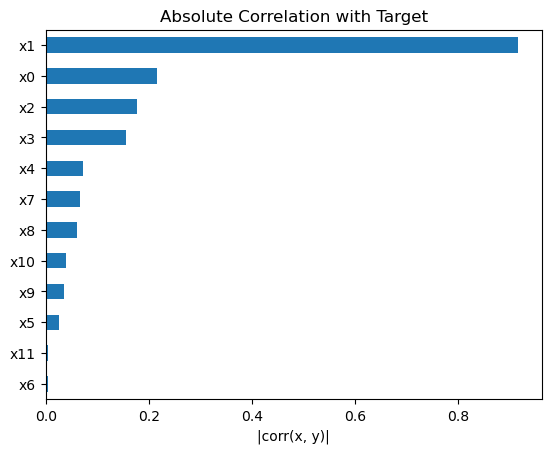

In [3]:
correlations = df.apply(lambda x: np.corrcoef(x, y)[0,1])

plt.figure()
correlations.abs().sort_values().plot(kind="barh")
plt.title("Absolute Correlation with Target")
plt.xlabel("|corr(x, y)|")
plt.show()


As expected, 4 variables are showing strong correlation

Text(0.5, 1.0, 'Correlation')

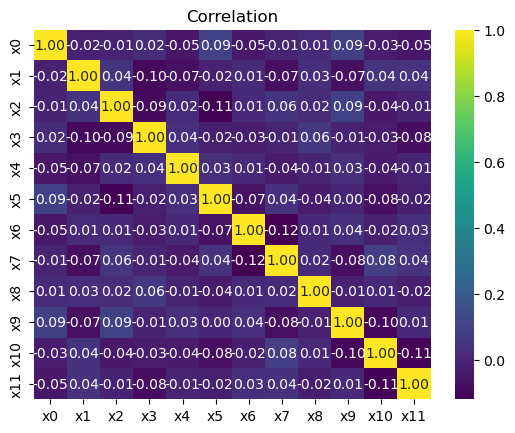

In [7]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis")
plt.title("Correlation")

No two variables are strongly correlated

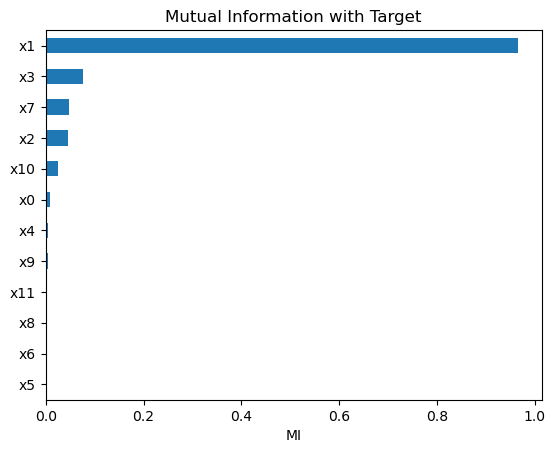

In [4]:
mi = mutual_info_regression(df, y)
mi_series = pd.Series(mi, index=feature_names)

plt.figure()
mi_series.sort_values().plot(kind="barh")
plt.title("Mutual Information with Target")
plt.xlabel("MI")
plt.show()


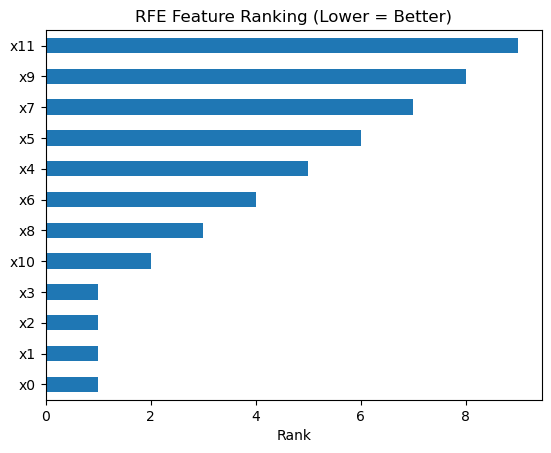

In [5]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=4)
rfe.fit(df, y)

ranking = pd.Series(rfe.ranking_, index=feature_names)

plt.figure()
ranking.sort_values().plot(kind="barh")
plt.title("RFE Feature Ranking (Lower = Better)")
plt.xlabel("Rank")
plt.show()


x0     21.401930
x1     88.208761
x2     15.258503
x3     24.015363
x4     -0.437957
x5     -0.299728
x6      0.660028
x7     -0.200748
x8      1.137430
x9      0.165581
x10     1.818831
x11     0.011687
dtype: float64


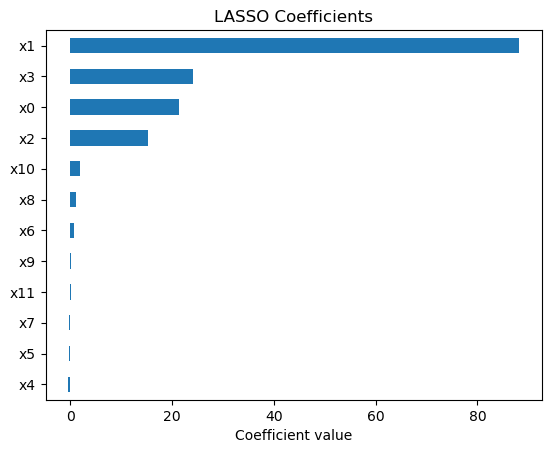

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

lasso = Lasso(alpha=0.1)
lasso.fit(X_scaled, y)

coef = pd.Series(lasso.coef_, index=feature_names)
print(coef)
plt.figure()
coef.sort_values().plot(kind="barh")
plt.title("LASSO Coefficients")
plt.xlabel("Coefficient value")
plt.show()

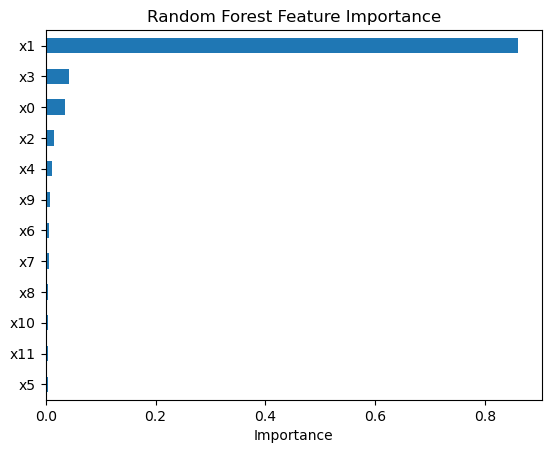

In [10]:
rf = RandomForestRegressor(n_estimators=200)
rf.fit(df, y)

importance = pd.Series(rf.feature_importances_, index=feature_names)

plt.figure()
importance.sort_values().plot(kind="barh")
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3)

# Baseline
lr = LinearRegression()
lr.fit(X_train, y_train)
baseline_rmse = mean_squared_error(y_test, lr.predict(X_test), squared=False)

# Selected features via LASSO
selected = coef[coef > 16].index
lr.fit(X_train[selected], y_train)
selected_rmse = mean_squared_error(
    y_test, lr.predict(X_test[selected]), squared=False
)

baseline_rmse, selected_rmse


/home/vidya/anaconda3/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/vidya/anaconda3/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(14.939453871385536, 19.694800264670167)